In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

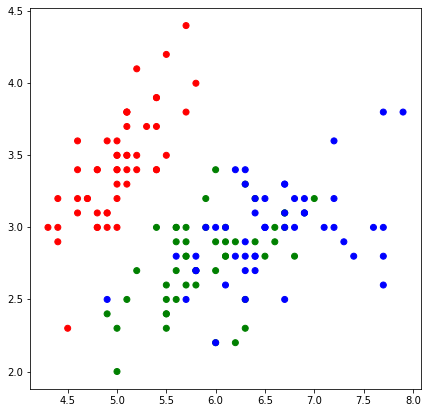

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    
    return np.sqrt(np.sum((x2-x1)**2))

In [31]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            weight = 1 / distance if distance != 0 else np.inf
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i], weight))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += d[2]
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [32]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [57]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')


Точность алгоритма при k = 3: 0.767


In [46]:
x = X_test[10]
test_distances = []
            
for i in range(len(X_train)):

    # расчет расстояния от классифицируемого объекта до
    # объекта обучающей выборки
    distance = e_metrics(x, X_train[i])

    # Записываем в список значение расстояния и ответа на объекте обучающей выборки
    test_distances.append((distance, y_train[i]))

In [48]:
classes = {class_item: 0 for class_item in set(y_train)}
classes

{0: 0, 1: 0, 2: 0}

In [49]:
sorted(test_distances)[0:k]

[(0.09999999999999964, 2),
 (0.14142135623730964, 1),
 (0.14142135623730995, 1),
 (0.19999999999999973, 1),
 (0.20000000000000018, 1)]

In [50]:
np.exp(-0)

1.0

In [51]:
weighted_classes = []
max_dist = max(test_distances)[0]
for dist, cls in sorted(test_distances)[0:k]:
    weight = np.exp(-dist)
    weighted_classes.append((dist, weight, cls))

In [52]:
weighted_classes

[(0.09999999999999964, 0.9048374180359599, 2),
 (0.14142135623730964, 0.8681234453945847, 1),
 (0.14142135623730995, 0.8681234453945845, 1),
 (0.19999999999999973, 0.818730753077982, 1),
 (0.20000000000000018, 0.8187307530779817, 1)]

In [53]:
for d in weighted_classes:
    classes[d[2]] += d[1]

In [54]:
classes

{0: 0, 1: 3.373708396945133, 2: 0.9048374180359599}

In [55]:
answers = []
answers.append(sorted(classes, key=classes.get)[-1])

In [56]:
answers

[1]